In [1]:
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("./data/raw/18_19.csv")
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,10/8/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,11/8/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,11/8/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,11/8/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,11/8/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [3]:
referees=df[['Referee']]
match_data=df[['HF','AF','HY','AY','HR','AR']]
match_data.head()

,HF,AF,HY,AY,HR,AR
0,11,8,2,1,0,0
1,11,9,1,1,0,0
2,9,11,1,2,0,0
3,9,8,2,1,0,0
4,11,12,2,2,0,0


In [4]:
match_data.describe()

,HF,AF,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,10.152632,10.305263,1.526316,1.684211,0.047368,0.076316
std,3.293532,3.503707,1.222844,1.209140,0.212706,0.275599
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000
max,23.000000,21.000000,6.000000,5.000000,1.000000,2.000000


<AxesSubplot:title={'center':'Home Fouls'}, ylabel='Frequency'>

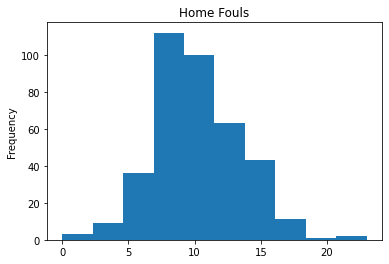

In [36]:
match_data['HF'].plot.hist(title='Home Fouls')

<AxesSubplot:title={'center':'Away Fouls'}, ylabel='Frequency'>

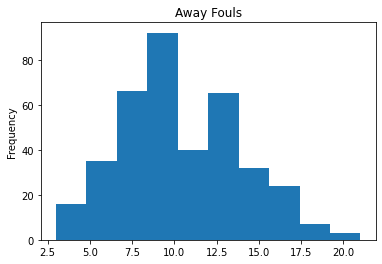

In [35]:
match_data['AF'].plot.hist(title='Away Fouls')

<AxesSubplot:title={'center':'Home Yellow Cards'}, ylabel='Frequency'>

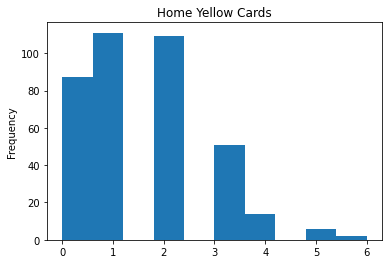

In [37]:
match_data['HY'].plot.hist(title='Home Yellow Cards')

<AxesSubplot:title={'center':'Away Yellow Cards'}, ylabel='Frequency'>

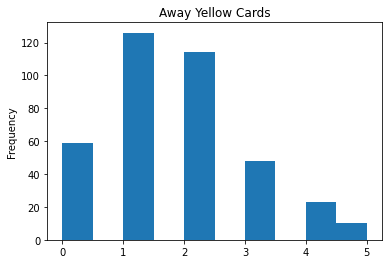

In [38]:
match_data['AY'].plot.hist(title='Away Yellow Cards')

<AxesSubplot:title={'center':'Home Red Cards'}, ylabel='Frequency'>

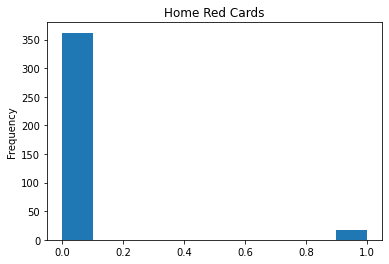

In [39]:
match_data['HR'].plot.hist(title='Home Red Cards')

<AxesSubplot:title={'center':'Away Red Cards'}, ylabel='Frequency'>

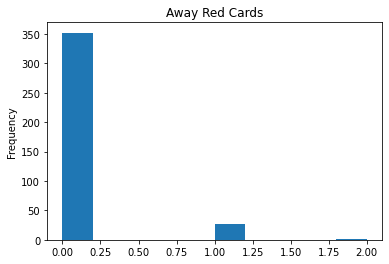

In [40]:
match_data['AR'].plot.hist(title='Away Red Cards')

In [5]:
fouls=[]

for x in range(0,len(match_data['HF'])):
    high=max(match_data['HF'][x],match_data['AF'][x])
    low=min(match_data['AF'][x],match_data['HF'][x])
    ratio=(high-low)/high
    fouls.append(ratio)

match_data.insert(value=fouls,column='Foul Ratio',loc=len(match_data.columns))

In [6]:
ycards=[]
for x in range(0,len(match_data['HY'])):
    high=max(match_data['HY'][x],match_data['AY'][x])
    low=min(match_data['AY'][x],match_data['HY'][x])
    ratio=(high-low)/high
    if math.isnan(ratio):
        ratio=0
    elif low>0 and high<3:
        ratio=0.30
    ycards.append(ratio)
    
match_data.insert(value=ycards,column='Yellow Card Ratio',loc=len(match_data.columns))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [7]:
rcards=[]
for x in range(0,len(match_data['HR'])):
    high=max(match_data['HR'][x],match_data['AR'][x])
    low=min(match_data['AR'][x],match_data['HR'][x])
    ratio=(high-low)/high
    if math.isnan(ratio):
        ratio=0
    elif ratio>=0.5 and high<2:
        ratio=0.30
    rcards.append(ratio)
    
match_data.insert(value=rcards,column='Red Card Ratio',loc=len(match_data.columns))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


In [8]:
match_data.head()

,HF,AF,HY,AY,HR,AR,Foul Ratio,Yellow Card Ratio,Red Card Ratio
0,11,8,2,1,0,0,0.272727,0.3,0.0
1,11,9,1,1,0,0,0.181818,0.3,0.0
2,9,11,1,2,0,0,0.181818,0.3,0.0
3,9,8,2,1,0,0,0.111111,0.3,0.0
4,11,12,2,2,0,0,0.083333,0.3,0.0


<AxesSubplot:ylabel='Frequency'>

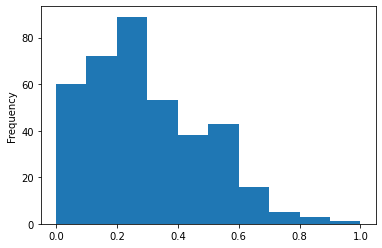

In [9]:
match_data['Foul Ratio'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

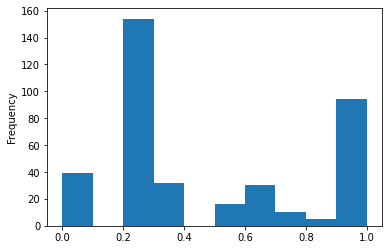

In [10]:
match_data['Yellow Card Ratio'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

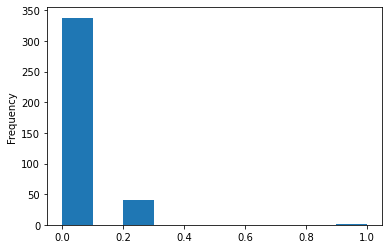

In [11]:
match_data['Red Card Ratio'].plot.hist()

In [12]:
match_data.describe()

,HF,AF,HY,AY,HR,AR,Foul Ratio,Yellow Card Ratio,Red Card Ratio
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,10.152632,10.305263,1.526316,1.684211,0.047368,0.076316,0.290333,0.501228,0.035000
std,3.293532,3.503707,1.222844,1.209140,0.212706,0.275599,0.191499,0.334875,0.105577
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.142857,0.300000,0.000000
50%,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.272727,0.300000,0.000000
75%,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000,0.416667,0.800000,0.000000
max,23.000000,21.000000,6.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [13]:
foul_mean=match_data['Foul Ratio'].mean()
ycard_mean=match_data['Yellow Card Ratio'].mean()
rcard_mean=match_data['Red Card Ratio'].mean()

In [14]:
bias=[]
for x in range(0,len(match_data['HF'])):
    ratio_total=(match_data['Foul Ratio'][x]+match_data['Yellow Card Ratio'][x]+match_data['Red Card Ratio'][x])
    averages=(foul_mean+ycard_mean+rcard_mean)
    if ratio_total>averages:
        bias.append(1)
    else:
        bias.append(0)

In [15]:
match_data['Bias Rating']=bias

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
match_data.head()

,HF,AF,HY,AY,HR,AR,Foul Ratio,Yellow Card Ratio,Red Card Ratio,Bias Rating
0,11,8,2,1,0,0,0.272727,0.3,0.0,0
1,11,9,1,1,0,0,0.181818,0.3,0.0,0
2,9,11,1,2,0,0,0.181818,0.3,0.0,0
3,9,8,2,1,0,0,0.111111,0.3,0.0,0
4,11,12,2,2,0,0,0.083333,0.3,0.0,0


In [17]:
match_data.describe()

,HF,AF,HY,AY,HR,AR,Foul Ratio,Yellow Card Ratio,Red Card Ratio,Bias Rating
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,10.152632,10.305263,1.526316,1.684211,0.047368,0.076316,0.290333,0.501228,0.035000,0.439474
std,3.293532,3.503707,1.222844,1.209140,0.212706,0.275599,0.191499,0.334875,0.105577,0.496977
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.142857,0.300000,0.000000,0.000000
50%,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.272727,0.300000,0.000000,0.000000
75%,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000,0.416667,0.800000,0.000000,1.000000
max,23.000000,21.000000,6.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X=match_data[['HF','AF','HY','AY','HR','AR']]
y=match_data[['Bias Rating']]

In [19]:
X.head()

,HF,AF,HY,AY,HR,AR
0,11,8,2,1,0,0
1,11,9,1,1,0,0
2,9,11,1,2,0,0
3,9,8,2,1,0,0
4,11,12,2,2,0,0


In [20]:
y.head()

,Bias Rating
0,0
1,0
2,0
3,0
4,0


<AxesSubplot:ylabel='Frequency'>

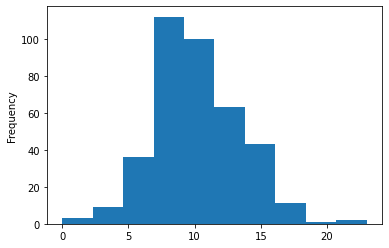

In [21]:
X['HF'].plot.hist()

In [22]:
scaler=MinMaxScaler()

In [23]:
X_norm=scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [25]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [26]:
clf.fit(X_train,y_train)

/home/barry/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [27]:
y_pred=clf.predict(X_test)

In [28]:
y_test.insert(loc=len(y_test.columns),value=y_pred,column='Prediction')

In [29]:
y_test.head()

,Bias Rating,Prediction
266,1,1
261,0,0
265,0,0
39,0,0
33,0,0


In [41]:
score=accuracy_score(y_test['Bias Rating'],y_test['Prediction'])
print("Accuracy score:",score)

Accuracy score: 0.8157894736842105


In [31]:
df2=pd.read_csv("./data/raw/17_18.csv")
X2=df2[['HF','AF','HY','AY','HR','AR']]
X2.head()

,HF,AF,HY,AY,HR,AR
0,9,12,0,1,0,0
1,6,9,0,2,0,0
2,16,11,3,3,2,0
3,7,19,1,3,0,0
4,13,10,1,1,0,0


In [32]:
X2_test=scaler.transform(X2)
y2_pred=clf.predict(X2_test)
X2.insert(loc=len(X2.columns),value=y2_pred,column='Prediction')
X2.head()

,HF,AF,HY,AY,HR,AR,Prediction
0,9,12,0,1,0,0,0
1,6,9,0,2,0,0,1
2,16,11,3,3,2,0,0
3,7,19,1,3,0,0,1
4,13,10,1,1,0,0,0


In [47]:
count=0
for x in y_test['Prediction']:
    if x==1:
        count+=1
        
print("Estimated number of times officials were biased:",count)

Estimated number of times officials were biased: 31
